<a href="https://colab.research.google.com/github/klobell/constitutions/blob/main/freedom_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Choropleths and Scatterplots of Constitutions' Freedom Sentiment and Indices

The shapefile of the countries of the world is from [this website](https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/?flg=en-us).

In [ ]:
import geopandas as gpd

<Axes: >

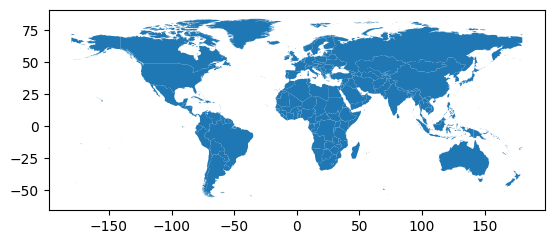

In [ ]:

constitutions_gdf = gpd.read_file("/content/world-administrative-boundaries.zip")
constitutions_gdf.rename(columns={'name': 'Country'}, inplace=True)

# updating names to merge with constitutions_df
constitutions_gdf["Country"] = constitutions_gdf["Country"].replace({
    "Russian Federation": "Russia",
    "Iran (Islamic Republic of)": "Iran",
    "Democratic People's Republic of Korea": "North Korea",
    "Libyan Arab Jamahiriya": "Libya",
    "Syrian Arab Republic": "Syria",
})

constitutions_gdf.plot()


In [ ]:
# mergings dfs

constitutions_gdf = constitutions_gdf.merge(
    constitutions_df,
    on="Country",
    how="inner"
    )


In [ ]:
import matplotlib.pyplot as plt

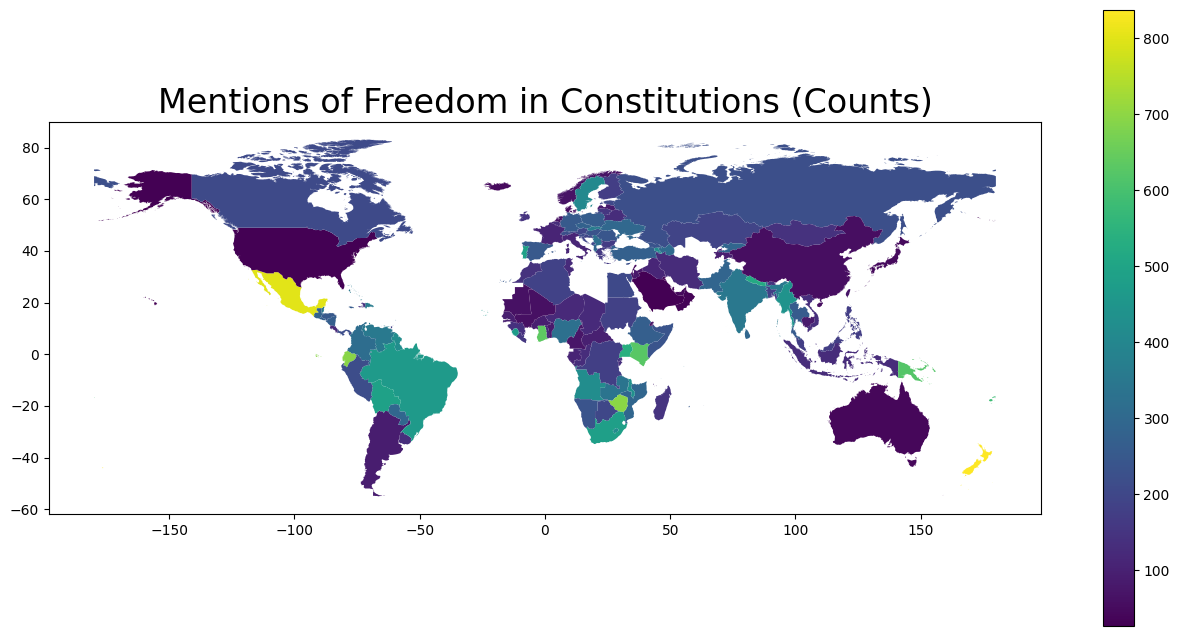

In [ ]:
# freedom count choropleth

fig, ax = plt.subplots(figsize=(16, 8))
constitutions_gdf.plot(column="freedom_count", legend=True, ax=ax)
ax.set_title("Mentions of Freedom in Constitutions (Counts)", fontsize=24)
plt.show()


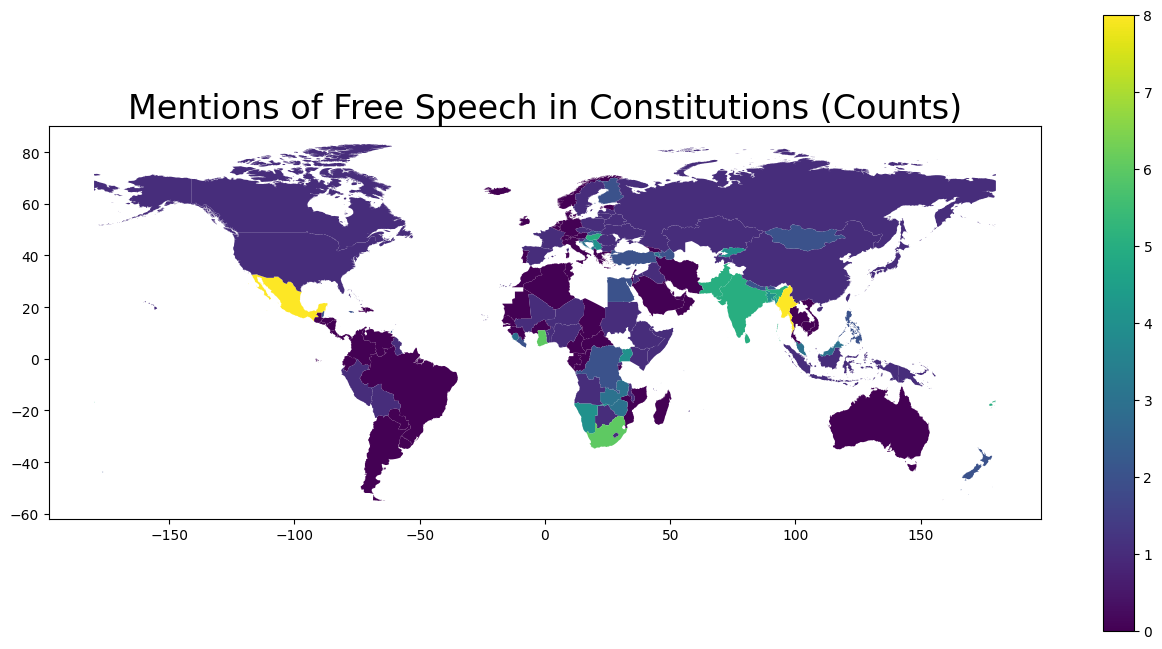

In [ ]:
# freedom of speech count choropleth

fig, ax = plt.subplots(figsize=(16, 8))
constitutions_gdf.plot(column="freedom_of_speech_count", legend=True, ax=ax)
ax.set_title("Mentions of Free Speech in Constitutions (Counts)", fontsize=24)
plt.show()


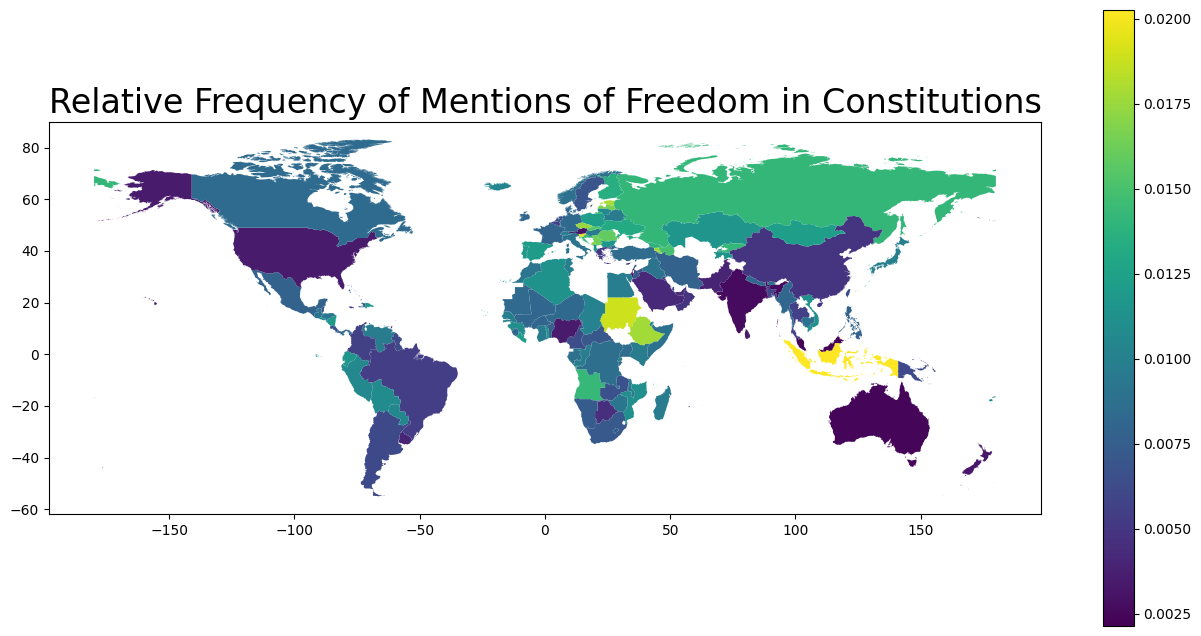

In [ ]:
# freedom frequency choropleth

fig, ax = plt.subplots(figsize=(16, 8))
constitutions_gdf.plot(column="freedom_frequency", legend=True, ax=ax)
ax.set_title("Relative Frequency of Mentions of Freedom in Constitutions", fontsize=24)
plt.show()


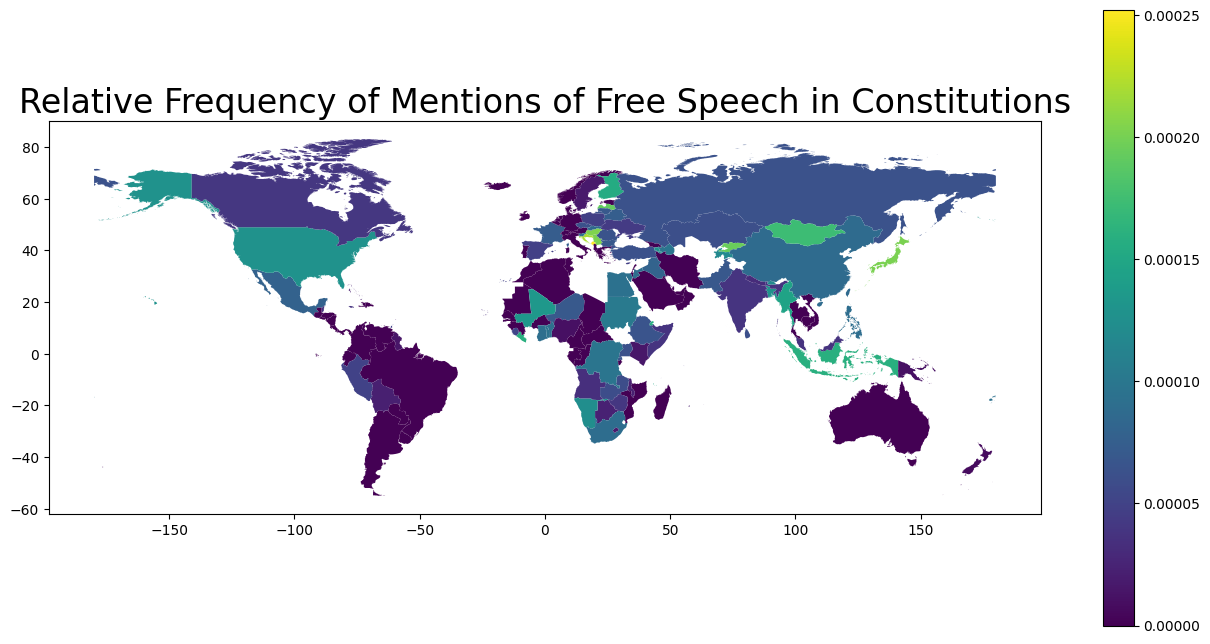

In [ ]:
# freedom of speech frequency choropleth

fig, ax = plt.subplots(figsize=(16, 8))
constitutions_gdf.plot(column="freedom_of_speech_frequency", legend=True, ax=ax)
ax.set_title("Relative Frequency of Mentions of Free Speech in Constitutions", fontsize=24)
plt.show()


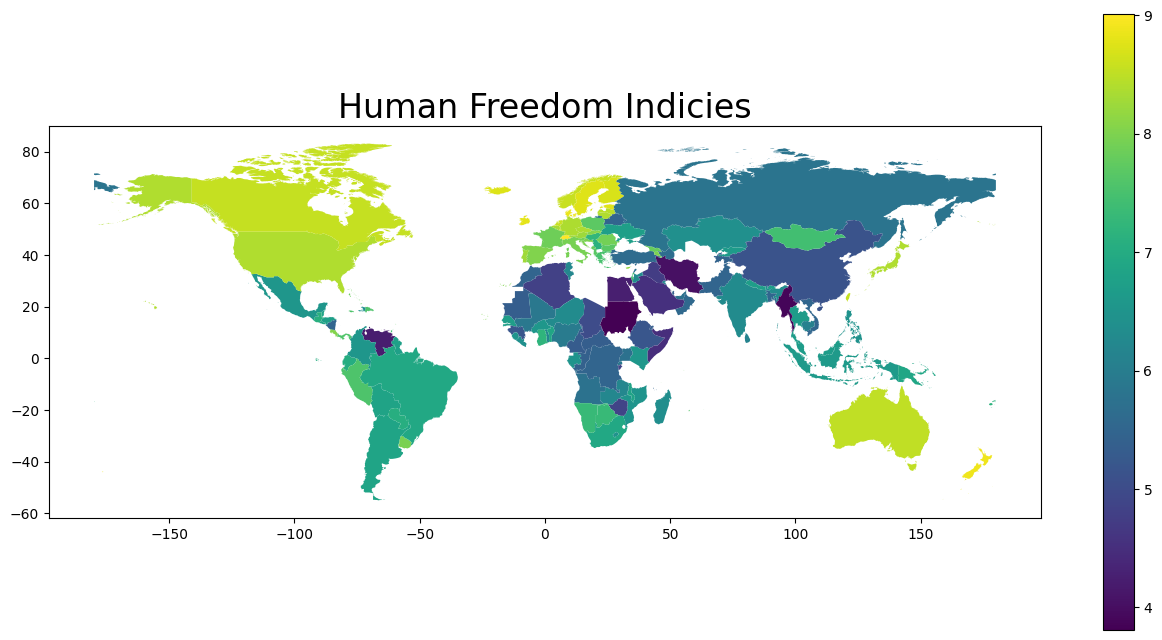

In [ ]:
# freedom index choropleth

fig, ax = plt.subplots(figsize=(16, 8))
constitutions_gdf.plot(column="human_freedom_index", legend=True, ax=ax)
ax.set_title("Human Freedom Indicies", fontsize=24)
plt.show()


In [ ]:
# Scatterplot of Freedom Sentiment vs. Indices Constitutions

import plotly.express as px

fig = px.scatter(constitutions_df, x="freedom_frequency",
                 y="human_freedom_index",
                 color='Country')

r_value = constitutions_df["freedom_frequency"].corr(constitutions_df["human_freedom_index"])

fig.update_layout(
    title=f"Relative Frequency of Mentions of Freedom vs Human Freedom Index by Country\n(r = {r_value:.2f})",
    xaxis_title="Relative Frequency of Mentions of Freedom",
    yaxis_title="Human Freedom Index by Country",
    font={"size": 17}
)

fig
